##WeatherPy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 602


In [3]:
# Set the API base URL
url = 'http://api.openweathermap.org'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}/data/2.5/weather?q={city}&appid={weather_api_key}'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)

        city_weather = json.loads(response.text)

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]  
        city_wind = city_weather["wind"]["speed"]   
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]


        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date
                          })

        
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | naze
Processing Record 3 of Set 1 | whitehorse
Processing Record 4 of Set 1 | jwaneng
Processing Record 5 of Set 1 | arteaga
Processing Record 6 of Set 1 | kantagi
Processing Record 7 of Set 1 | lata
Processing Record 8 of Set 1 | muntok
Processing Record 9 of Set 1 | kokopo
Processing Record 10 of Set 1 | tolanaro
Processing Record 11 of Set 1 | longyearbyen
Processing Record 12 of Set 1 | petropavlovsk-kamchatsky
Processing Record 13 of Set 1 | san luis de la loma
Processing Record 14 of Set 1 | stanley
Processing Record 15 of Set 1 | susuman
Processing Record 16 of Set 1 | trincomalee
Processing Record 17 of Set 1 | sao joao da barra
Processing Record 18 of Set 1 | coron
Processing Record 19 of Set 1 | mandan
Processing Record 20 of Set 1 | blackmans bay
Processing Record 21 of Set 1 | hawaiian paradise park
Processing Record 22 of Set 1 | badge

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          578
Lat           578
Lng           578
Max Temp      578
Humidity      578
Cloudiness    578
Wind Speed    578
Country       578
Date          578
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,276.87,88,100,17.52,TF,1698719189
1,naze,28.3667,129.4833,297.66,66,91,5.34,JP,1698719189
2,whitehorse,60.7161,-135.0538,274.58,93,100,2.57,CA,1698719116
3,jwaneng,-24.6004,24.7303,283.91,76,100,8.62,BW,1698719189
4,arteaga,18.4667,-102.4167,292.05,98,66,1.32,MX,1698719190


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,276.87,88,100,17.52,TF,1698719189
1,naze,28.3667,129.4833,297.66,66,91,5.34,JP,1698719189
2,whitehorse,60.7161,-135.0538,274.58,93,100,2.57,CA,1698719116
3,jwaneng,-24.6004,24.7303,283.91,76,100,8.62,BW,1698719189
4,arteaga,18.4667,-102.4167,292.05,98,66,1.32,MX,1698719190


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

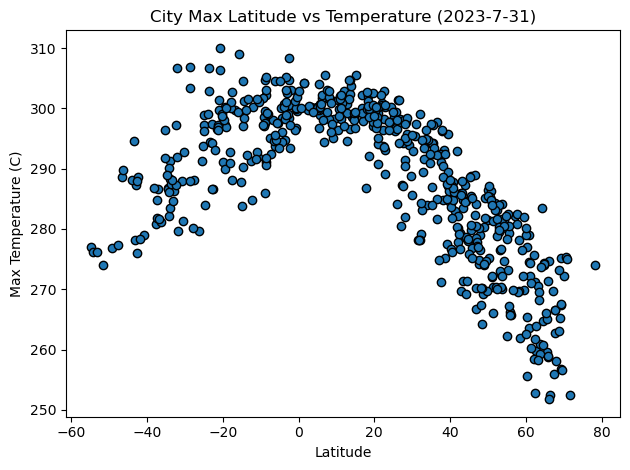

In [8]:
# Build scatter plot for latitude vs. temperature
x= city_data_df['Lat']
y = city_data_df['Max Temp']

plt.scatter(x,y, edgecolor='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Max Latitude vs Temperature (2023-7-31)')
plt.tight_layout()


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

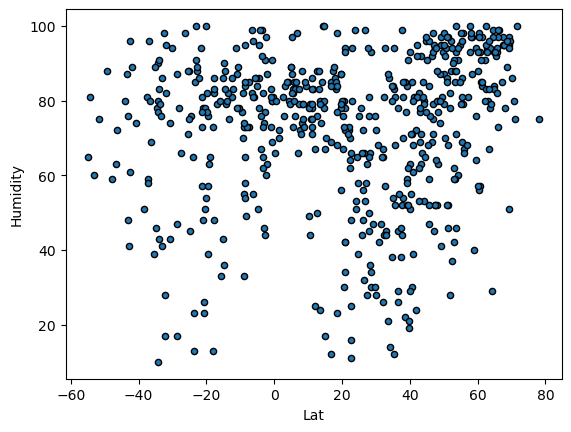

In [9]:
# Build the scatter plots for latitude vs. humidity
x= 'Lat'
y = 'Humidity'

city_data_df.plot(kind='scatter', x=x,y=y, edgecolor='black')


# Incorporate the other graph properties
plt.xlabel = 'Latitude'
plt.ylabel = 'Humidity (%)'
plt.title = 'City Latitude vs Humidity (2023-7-31)'
plt.tight_layout

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()